### <b> Problem Statement: </b>

Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. <br>
Determine the number of clusters using the elbow method.


### <b> Solution: </b>
Importing Libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [230]:
data = pd.read_csv('Datasets/sales.csv', encoding="ISO-8859-1")

In [231]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [232]:
data = data.drop(['ADDRESSLINE2', 'STATE', 'TERRITORY', 'ORDERDATE', 'PRODUCTCODE', 'PHONE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'POSTALCODE', 'CITY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ORDERNUMBER'], axis = 1)
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,USA,Medium


In [233]:
data.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
COUNTRY            0
DEALSIZE           0
dtype: int64

Selecting 2 attributes for clustering. QUANTITYORDERED and ORDERLINENUMBER

In [234]:
df = data.iloc[:, [0, 2]].values

In [235]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(df)

Determining optimal number of clusters using elbow method. within-cluster sum of square (WCSS). At the bendd wwe get the no. of clusters

<AxesSubplot:>

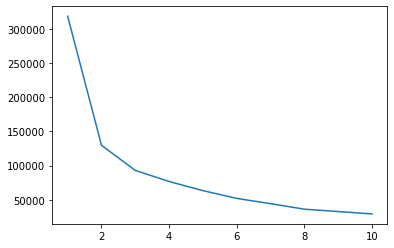

In [236]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df) 
    wcss.append(kmeans.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)

Creating K-means model

In [237]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [238]:
df

array([[30,  2],
       [34,  5],
       [41,  2],
       ...,
       [43,  4],
       [34,  1],
       [47,  9]], dtype=int64)

Visualizing the clusters

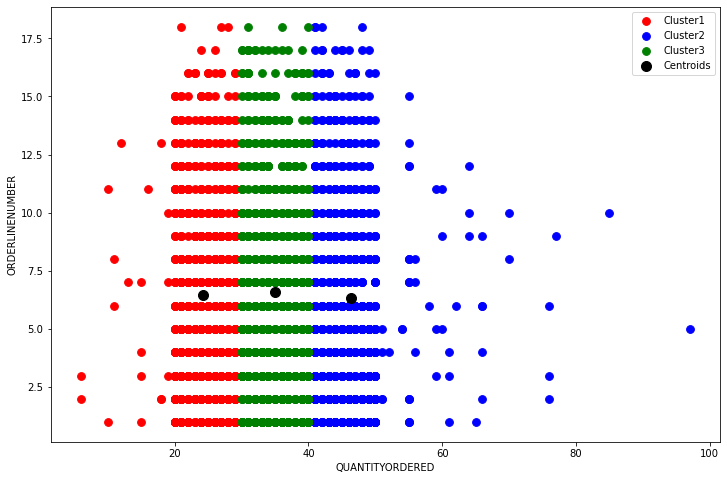

In [239]:
plt.subplots(figsize=(12,8))
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('ORDERLINENUMBER')
plt.legend()
plt.show()

Without clustering

In [240]:
df1 = data[['QUANTITYORDERED', 'ORDERLINENUMBER']]

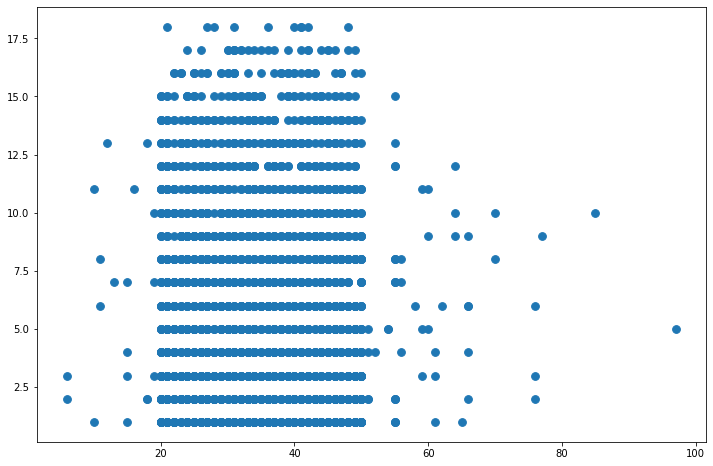

In [241]:
plt.subplots(figsize=(12,8))
plt.scatter(data=df1, x='QUANTITYORDERED', y='ORDERLINENUMBER', s= 60)